Team id:PNT2022TMID30994


**DATA COLLECTION**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/MyDrive/Deaf

/content/drive/MyDrive/Deaf


In [4]:
ls

aslpng1.h5  Dataset/  data.zip


In [ ]:
!unzip /content/drive/MyDrive/Deaf/data.zip

Archive:  /content/drive/MyDrive/Deaf/data.zip
replace Dataset/test_set/A/1.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

**IMAGE PREPROCESSING**

In [5]:
# Importing the ImageDataGenerator library
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
# Configure ImageDatagenerator class
train_datagen = ImageDataGenerator(rescale = 1./255, horizontal_flip = True, vertical_flip = True, zoom_range = 0.2) #for train data

In [7]:
test_datagen = ImageDataGenerator(rescale = 1./255) # for test data 

In [8]:
# Applying ImageDataGenerator functionality to Testset
x_train = train_datagen.flow_from_directory(r"/content/drive/MyDrive/Deaf/Dataset/training_set", target_size =(64,64), class_mode = "categorical", batch_size = 300,color_mode="grayscale")

Found 15750 images belonging to 9 classes.


In [9]:
# Applying ImageDataGenerator functionality to Trainset
x_test = test_datagen.flow_from_directory(r"/content/drive/MyDrive/Deaf/Dataset/test_set", target_size = (64,64), class_mode = "categorical", batch_size = 300,color_mode="grayscale")

Found 2250 images belonging to 9 classes.


In [10]:
len(x_train)

53

In [11]:
len(x_test)

8

In [12]:
x_train.class_indices

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8}

**MODEL BUILDING**

Importing the Building Libraries

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten


In [14]:
#Creating the model
model=Sequential()
#Adding the layers
model.add(Convolution2D(32,(3,3), input_shape=(64,64,1), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

#adding hidden layers
model.add(Dense(400, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))

#Adding the output layer
model.add(Dense(9, activation='softmax'))

In [15]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
model.fit_generator(x_train, steps_per_epoch=30, epochs=5, validation_data=x_test,validation_steps=50)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/5
30/30 [==============================] - ETA: 0s - loss: 0.8659 - accuracy: 0.6819  

30/30 [==============================] - 2541s 85s/step - loss: 0.8659 - accuracy: 0.6819 - val_loss: 0.3251 - val_accuracy: 0.9027
Epoch 2/5
30/30 [==============================] - 874s 29s/step - loss: 0.2385 - accuracy: 0.9164
Epoch 3/5
30/30 [==============================] - 368s 12s/step - loss: 0.1030 - accuracy: 0.9687
Epoch 4/5
30/30 [==============================] - 176s 6s/step - loss: 0.0637 - accuracy: 0.9820
Epoch 5/5
30/30 [==============================] - 95s 3s/step - loss: 0.0545 - accuracy: 0.9851


In [17]:
model.save('Myproject.h5')

**TEST THE MODEL**

In [18]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import cv2

In [20]:
model = load_model('/content/drive/MyDrive/Deaf/Myproject.h5')

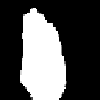

In [21]:
img = image.load_img('/content/drive/MyDrive/Deaf/Dataset/test_set/B/111.png',target_size = (100,100))
img

In [22]:
from skimage.transform import resize
def detect(frame):
    img=image.img_to_array(frame)
    img = resize(img,(64,64,1))
    img = np.expand_dims(img,axis=0)
    pred=np.argmax(model.predict(img))
    op=['A','B','C','D','E','F','G','H','I']
    print("THE PREDICTED LETTER IS ",op[pred])

In [23]:
img=image.load_img("/content/drive/MyDrive/Deaf/Dataset/test_set/B/112.png")
detect(img)

1/1 [==============================] - 0s 149ms/step
THE PREDICTED LETTER IS  B


In [24]:
img = image.load_img('/content/drive/MyDrive/Deaf/Dataset/test_set/E/10.png')
pred=detect(img)

1/1 [==============================] - 0s 34ms/step
THE PREDICTED LETTER IS  E


In [26]:
img=image.load_img('/content/drive/MyDrive/Deaf/Dataset/test_set/D/10.png')
detect(img)

1/1 [==============================] - 0s 36ms/step
THE PREDICTED LETTER IS  D
